In [1]:
import numpy as np

In [2]:
from scipy.linalg import inv

In [4]:
import matplotlib.pyplot as plt

# Euclidean formula #

In [19]:
n = 20

In [20]:
def my_euclidean(x, y):
    n = x.shape[0]
    x_y = x - y
    out = x_y @ x_y.T
    return out ** 0.5

In [21]:
pt_1 = np.random.uniform(-1, 1, n)
pt_2 = np.random.uniform(-1, 1, n)

In [22]:
my_euclidean(pt_1, pt_2)

3.9203991332411294

In [23]:
euclidean(pt_1, pt_2)

3.9203991332411294

# Mahalanobis with identity matrix is Euclidean distance #

In [6]:
n = 20

In [7]:
from scipy.spatial.distance import euclidean, mahalanobis

In [8]:
mah_matr = np.eye(n)

In [9]:
pt_1 = np.random.uniform(-1, 1, n)
pt_2 = np.random.uniform(-1, 1, n)

In [10]:
euclidean(pt_1, pt_2)

4.32960290693301

In [11]:
mahalanobis(pt_1, pt_2, mah_matr)

4.32960290693301

# Mahalanobis with inverse component variance matrix is SEuclidean distance #

In [12]:
n = 20

In [13]:
from scipy.spatial.distance import seuclidean

In [14]:
pt_var = np.random.uniform(0, 3, n)

In [15]:
pt_1 = np.random.normal(0, pt_var, n)
pt_2 = np.random.normal(0, pt_var, n)

In [16]:
mah_matr = np.diag(1 / pt_var)

In [17]:
seuclidean(pt_1, pt_2, pt_var)

7.800937396465261

In [18]:
mahalanobis(pt_1, pt_2, mah_matr)

7.80093739646526

# Mahalanobis as dimensionality reducer #

In [158]:
pt_1 = np.random.uniform([-1, -1], [0, 1], (1, 2))
pt_2 = np.random.uniform([0, -1], [1, 1], (1, 2))

In [167]:
mah_matr = np.diag([0.0001, 1])

In [168]:
pt_1, pt_2

(array([[-0.55430411,  0.62027112]]), array([[0.54790568, 0.02847197]]))

In [169]:
mahalanobis(pt_1, pt_2, mah_matr)

0.5919017792956578

# LMNN #

We have a classification problem, in which only one of two given features correlates with target.

In [266]:
n = 500

In [268]:
cluster_1 = np.random.uniform([-15, -2], [15, 0], (n, 2))
cluster_2 = np.random.uniform([-15, 0], [15, 2], (n // 2, 2))

In [269]:
data_lmnn = np.concatenate([cluster_1, cluster_2], axis=0)

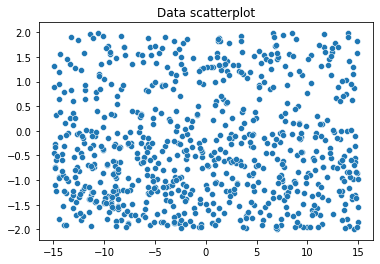

In [270]:
plot_data(data_lmnn)

In [273]:
y = np.concatenate([[0] * n, [1] * (n // 2)])

In [275]:
from sklearn.model_selection import train_test_split

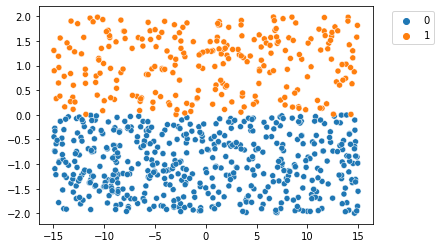

In [298]:
sns.scatterplot(data_lmnn[:, 0], data_lmnn[:, 1], hue = y)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [276]:
X_train, X_test, y_train, y_test = train_test_split(data_lmnn, y, shuffle = True, test_size=0.5)

In [277]:
from sklearn.neighbors import KNeighborsClassifier

In [278]:
from sklearn.metrics import accuracy_score as acc

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
!pip install metric_learn

In [95]:
import metric_learn
from metric_learn import LMNN

In [201]:
from tqdm import tqdm

In [214]:
from sklearn.preprocessing import StandardScaler

In [289]:
ssc = StandardScaler()

In [290]:
ssc.fit(X_train, y_train)
X_train_ssc = ssc.transform(X_train)
X_test_ssc = ssc.transform(X_test)

We will compare the following approaches:
- No preprocessing
- LMNN
- StandardScaler 
- StandardScaler + LMNN

In [291]:
ks = range(1, 20)
quals_2d = []
lmnn_quals_2d = []
s_quals_2d = []
s_lmnn_quals_2d = []
mahs_2d = []
s_mahs_2d = []
for k in tqdm(ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    qual = acc(preds, y_test)
    quals_2d.append(qual)
    # LMNN fit    
    lmnn = LMNN(k=k)
    lmnn.fit(X_train, y_train)
    lmnn_metric = lmnn.get_metric()
    mahs_2d.append(lmnn.get_mahalanobis_matrix())
    # LMNN predict
    knn = KNeighborsClassifier(n_neighbors = k, metric = lmnn_metric)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    qual = acc(preds, y_test)
    lmnn_quals_2d.append(qual)
    # StandardScaler
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ssc, y_train)
    preds = knn.predict(X_test_ssc)
    qual = acc(preds, y_test)
    s_quals_2d.append(qual)
    # Standard LMNN fit    
    lmnn = LMNN(k=k)
    lmnn.fit(X_train_ssc, y_train)
    lmnn_s_metric = lmnn.get_metric()
    s_mahs_2d.append(lmnn.get_mahalanobis_matrix())
    # Standard LMNN predict
    knn = KNeighborsClassifier(n_neighbors = k, metric = lmnn_s_metric)
    knn.fit(X_train_ssc, y_train)
    preds = knn.predict(X_test_ssc)
    qual = acc(preds, y_test)
    s_lmnn_quals_2d.append(qual)



  0%|                                                    | 0/19 [00:00<?, ?it/s]

  5%|██▎                                         | 1/19 [00:06<01:50,  6.15s/it]

 11%|████▋                                       | 2/19 [00:13<01:50,  6.52s/it]

 16%|██████▉                                     | 3/19 [00:19<01:42,  6.38s/it]

 21%|█████████▎                                  | 4/19 [00:26<01:39,  6.64s/it]

 26%|███████████▌                                | 5/19 [00:37<01:48,  7.76s/it]

 32%|█████████████▉                              | 6/19 [00:46<01:45,  8.08s/it]

 37%|████████████████▏                           | 7/19 [00:56<01:46,  8.89s/it]

 42%|██████████████████▌                         | 8/19 [01:09<01:49,  9.93s/it]

 47%|████████████████████▊                       | 9/19 [01:20<01:43, 10.39s/it]

 53%|██████████████████████▋                    | 10/19 [01:36<01:49, 12.13s/it]

 58%|████████████████████████▉                  | 11/19 [01:54<01:50, 13.75s/it]

 63%|█████████

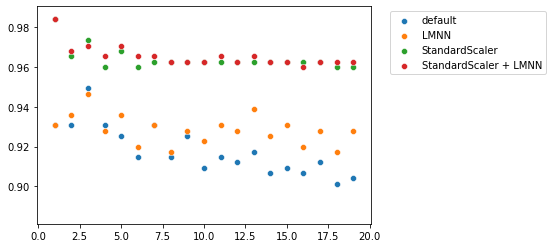

In [292]:
sns.scatterplot(ks, quals_2d, label = 'default')
sns.scatterplot(ks, lmnn_quals_2d, label = 'LMNN')
sns.scatterplot(ks, s_quals_2d, label = 'StandardScaler')
sns.scatterplot(ks, s_lmnn_quals_2d, label = 'StandardScaler + LMNN')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.show()

In [295]:
pd.DataFrame(s_mahs_2d[-1])

,0,1
0,2.280826,0.137724
1,0.137724,3.407211


In [299]:
pd.DataFrame(mahs_2d[-1])

,0,1
0,0.170789,-0.020235
1,-0.020235,0.750696


# A multidimensional example #

In [255]:
d = 6
d_meaningful = 4
d_vars = np.random.uniform(1, 10, d)
n = 10000
X = np.random.normal(np.zeros(d), d_vars, (n, d))
y = ((X[:, 0] - X[:, 1] + X[:, 2] ** (5 / 2) + np.log(X[:, 3])) > 1) * 1
# add noise
X += np.random.normal(np.zeros(d), 0.1, (n, d))

In [256]:
y.mean()

0.2262

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [258]:
ssc = StandardScaler()

In [259]:
ssc.fit(X_train, y_train)
X_train_ssc = ssc.transform(X_train)
X_test_ssc = ssc.transform(X_test)

In [260]:
from tqdm import tqdm

In [261]:
ks = range(1, 25)
quals = []
lmnn_quals = []
s_quals = []
s_lmnn_quals = []
mahs = []
s_mahs = []
for k in tqdm(ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    qual = acc(preds, y_test)
    quals.append(qual)
    # LMNN fit
    lmnn = LMNN(k=k)
    lmnn.fit(X_train, y_train)
    lmnn_metric = lmnn.get_metric()
    mahs.append(lmnn.get_mahalanobis_matrix())
    # LMNN predict
    knn = KNeighborsClassifier(n_neighbors = k, metric = lmnn_metric)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    qual = acc(preds, y_test)
    lmnn_quals.append(qual)
    # StandardScaler
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ssc, y_train)
    preds = knn.predict(X_test_ssc)
    qual = acc(preds, y_test)
    s_quals.append(qual)
    # Standard LMNN fit    
    lmnn = LMNN(k=k)
    lmnn.fit(X_train_ssc, y_train)
    lmnn_s_metric = lmnn.get_metric()
    s_mahs.append(lmnn.get_mahalanobis_matrix())
    # Standard LMNN predict
    knn = KNeighborsClassifier(n_neighbors = k, metric = lmnn_s_metric)
    knn.fit(X_train_ssc, y_train)
    preds = knn.predict(X_test_ssc)
    qual = acc(preds, y_test)
    s_lmnn_quals.append(qual)


100%|████████████████████████████████████████| 24/24 [5:10:22<00:00, 868.74s/it]

In [253]:
d_vars

array([4.28943016, 4.63503398, 4.38798714, 4.65754614, 4.76585447,
       4.63217864])

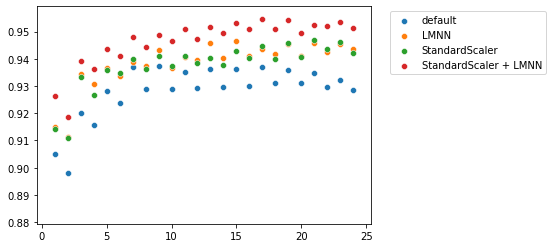

In [262]:
sns.scatterplot(ks, quals, label = 'default')
sns.scatterplot(ks, lmnn_quals, label = 'LMNN')
sns.scatterplot(ks, s_quals, label = 'StandardScaler')
sns.scatterplot(ks, s_lmnn_quals, label = 'StandardScaler + LMNN')
plt.legend(bbox_to_anchor=(1.04, 1), loc = 'upper left')
plt.show()

In [264]:
pd.DataFrame(s_mahs[-1])

,0,1,2,3,4,5
0,1.264410,0.005948,0.041915,0.008483,0.010105,-0.004448
1,0.005948,1.265841,-0.036580,0.006993,-0.009479,0.009080
2,0.041915,-0.036580,1.910448,0.045269,-0.019210,-0.017760
3,0.008483,0.006993,0.045269,1.803333,-0.002575,-0.016315
4,0.010105,-0.009479,-0.019210,-0.002575,1.264440,0.008323
5,-0.004448,0.009080,-0.017760,-0.016315,0.008323,1.260396


In [296]:
pd.DataFrame(mahs[-1])

,0,1,2,3,4,5
0,0.021866,-0.000112,0.000840,0.000111,0.000062,-0.000027
1,-0.000112,0.022007,-0.000278,0.000121,-0.000145,0.000160
2,0.000840,-0.000278,0.031833,0.001002,-0.000208,-0.000317
3,0.000111,0.000121,0.001002,0.034412,-0.000108,-0.000325
4,0.000062,-0.000145,-0.000208,-0.000108,0.021841,0.000162
5,-0.000027,0.000160,-0.000317,-0.000325,0.000162,0.021861
